# Assignment 2 - Grover's Algorithm
## Manuel Santos - 2019231352

In [603]:
%%capture
%pip install qiskit pylatexenc

In [604]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

simulator = StatevectorSampler()

In [605]:
q = QuantumRegister(3, name='q')

## Alínea (1)

In [606]:
# Criar circuito do oráculo
oracle_circuit = QuantumCircuit(q, name='Oracle')

oracle_circuit.x(q[1])

oracle_circuit.barrier()

oracle_circuit.h(q[2])
oracle_circuit.ccx(q[0], q[1], q[2])
oracle_circuit.h(q[2])

oracle_circuit.barrier()

oracle_circuit.x(q[1])

oracle_circuit.draw()


░                 ░      
q_0: ──────░────────■────────░──────
     ┌───┐ ░        │        ░ ┌───┐
q_1: ┤ X ├─░────────■────────░─┤ X ├
     └───┘ ░ ┌───┐┌─┴─┐┌───┐ ░ └───┘
q_2: ──────░─┤ H ├┤ X ├┤ H ├─░──────
           ░ └───┘└───┘└───┘ ░

In [607]:
print(oracle_circuit.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \qw \barrier[0em]{2} & \qw & \qw & \ctrl{1} & \qw \barrier[0em]{2} & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{X}} & \qw & \qw & \ctrl{1} & \qw & \qw & \gate{\mathrm{X}} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \qw & \qw & \gate{\mathrm{H}} & \targ & \gate{\mathrm{H}} & \qw & \qw & \qw & \qw\\
\\ }}
\end{document}


## Alínea (2)

In [608]:
# Criar circuito do operador de difusão
diffusion_circuit = QuantumCircuit(q, name='Diffusion')

diffusion_circuit.h(q)
diffusion_circuit.x(q)

diffusion_circuit.barrier()

diffusion_circuit.h(q[2])
diffusion_circuit.ccx(q[0], q[1], q[2])
diffusion_circuit.h(q[2])

diffusion_circuit.barrier()

diffusion_circuit.x(q)
diffusion_circuit.h(q)

diffusion_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_1: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤
q_2: ┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘

In [609]:
print(diffusion_circuit.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{X}} \barrier[0em]{2} & \qw & \qw & \ctrl{1} & \qw \barrier[0em]{2} & \qw & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \qw & \qw & \ctrl{1} & \qw & \qw & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \qw & \gate{\mathrm{H}} & \targ & \gate{\mathrm{H}} & \qw & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw\\
\\ }}
\end{document}


## Alínea (3)

In [610]:
# Criar circuito de Grover aqui
number_of_cycles = 2
grover_circuit = QuantumCircuit(q, name='Grover')

grover_circuit.h(q)

for _ in range(number_of_cycles):
    grover_circuit.barrier()
    grover_circuit.append(oracle_circuit, q)
    grover_circuit.append(diffusion_circuit, q)

grover_circuit.measure_all()

grover_circuit.draw()

┌───┐ ░ ┌─────────┐┌────────────┐ ░ ┌─────────┐┌────────────┐ ░ ┌─┐   »
   q_0: ┤ H ├─░─┤0        ├┤0           ├─░─┤0        ├┤0           ├─░─┤M├───»
        ├───┤ ░ │         ││            │ ░ │         ││            │ ░ └╥┘┌─┐»
   q_1: ┤ H ├─░─┤1 Oracle ├┤1 Diffusion ├─░─┤1 Oracle ├┤1 Diffusion ├─░──╫─┤M├»
        ├───┤ ░ │         ││            │ ░ │         ││            │ ░  ║ └╥┘»
   q_2: ┤ H ├─░─┤2        ├┤2           ├─░─┤2        ├┤2           ├─░──╫──╫─»
        └───┘ ░ └─────────┘└────────────┘ ░ └─────────┘└────────────┘ ░  ║  ║ »
meas: 3/═════════════════════════════════════════════════════════════════╩══╩═»
                                                                         0  1 »
«           
«   q_0: ───
«           
«   q_1: ───
«        ┌─┐
«   q_2: ┤M├
«        └╥┘
«meas: 3/═╩═
«         2

In [611]:
print(grover_circuit.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} \barrier[0em]{2} & \qw & \multigate{2}{\mathrm{Oracle}}_<<<{0} & \multigate{2}{\mathrm{Diffusion}}_<<<{0} \barrier[0em]{2} & \qw & \multigate{2}{\mathrm{Oracle}}_<<<{0} & \multigate{2}{\mathrm{Diffusion}}_<<<{0} \barrier[0em]{2} & \qw & \meter & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \qw & \ghost{\mathrm{Oracle}}_<<<{1} & \ghost{\mathrm{Diffusion}}_<<<{1} & \qw & \ghost{\mathrm{Oracle}}_<<<{1} & \ghost{\mathrm{Diffusion}}_<<<{1} & \qw & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \qw & \ghost{\mathrm{Oracle}}_<<<{2} & \ghost{\mathrm{Diffusion}}_<<<{2} & \qw & \ghost{\mathrm{Oracle}}_<<<{2} & \ghost{\mathrm{Diffusion}}_<<<{2} & \qw & \qw & \qw & \

In [612]:
# Simulação
runs = 1024
job = simulator.run([grover_circuit], shots=runs)
result = job.result()[0]
counts = result.data.meas.get_counts()

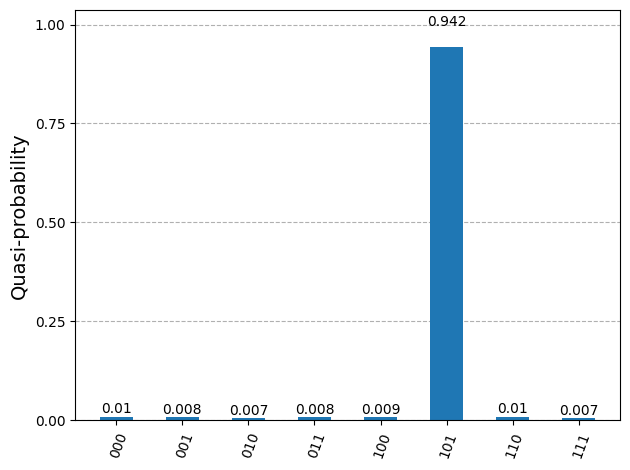

In [613]:
# Visualização
plot_histogram({k: v/1024 for k, v in counts.items()})